In [2]:
import pandas as pd
from pulp import *

### Business Profitability Problem
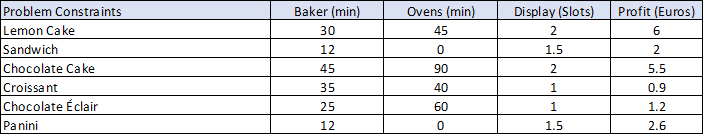

### Parameters

In [3]:
# Optimize your Bakery Model 

# Parameters 
items = ["A", "B", "C", "D", "E", "F"]
profit = {"A":6, "B":4.4, "C":7.5, "D":0.9, "E":1.2, "F":2.2}
baker = {"A":50, "B":0, "C":45, "D":35, "E":25, "F":0}
oven = {"A":45, "B":0, "C":90, "D":20, "E":45, "F":0}
display = {"A":4, "B":1.5, "C":3, "D":1, "E":1, "F":1}
assist = {"A":0, "B":12, "C":0, "D":0, "E":0, "F":8}

### Initialize Linear Optimization Problem

In [4]:
# Initiliaze Class
model = LpProblem('Maximize Bakery Profits', LpMaximize)

# 2. Define Decision Variables
A = LpVariable('A', lowBound = 0, cat = 'Integer')
B = LpVariable('B', lowBound = 0, cat = 'Integer')
C = LpVariable('C', lowBound = 0, cat = 'Integer')
D = LpVariable('D', lowBound = 0, cat = 'Integer')
E = LpVariable('E', lowBound = 0, cat = 'Integer')
F = LpVariable('F', lowBound = 0, cat = 'Integer')
var_dict = {"A":A, "B":B, "C":C, "D":D, "E":E, "F":F}

C:\Users\Samir\Anaconda3\lib\site-packages\pulp\pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


### Add Objective Function

In [5]:
# Define Objective Function
model += lpSum([profit[i] * var_dict[i] for i in items])

### Add Constraints

In [6]:
# 4. Define Constraints 
# Bakers
model += lpSum([var_dict[i]*baker[i] for i in items]) <= 24*60
# Oven
model += lpSum([var_dict[i]*oven[i] for i in items]) <= 48*60
# Assistant
model += lpSum([var_dict[i]*assist[i] for i in items]) <= 4*60
# Display
model += lpSum([var_dict[i]*display[i] for i in items]) <= 100

### Solve the model

In [7]:
# Names
dict_name = dict(zip(["A", "B", "C", "D", "E", "F"], 
                     ["Lemon Cake", "Sandwich", "Chocolate Cake", "Croissant", "Chocolate Eclair", "Panini"]))

# Solve Model
model.solve()
for v in model.variables():
    print(dict_name[v.name], "=", int(v.varValue))
print("{:,}/{:,} minutes of bakers used".format(sum([var_dict[i].varValue*baker[i] for i in items]), 24*60))
print("{:,}/{:,} minutes of oven used".format(sum([var_dict[i].varValue*oven[i] for i in items]), 48*60))
print("{:,}/{:,} minutes of assistant used".format(sum([var_dict[i].varValue*assist[i] for i in items]), 4*60))
print("{:,}/{:,} display slots".format(sum([var_dict[i].varValue*display[i] for i in items]), 200))
print("Profit reached: {:,} euros".format(sum(var_dict[i].varValue * profit[i] for i in items)))

Lemon Cake = 0
Sandwich = 20
Chocolate Cake = 23
Croissant = 0
Chocolate Eclair = 1
Panini = 0
1,060.0/1,440 minutes of bakers used
2,115.0/2,880 minutes of oven used
240.0/240 minutes of assistant used
100.0/200 display slots
Profit reached: 261.7 euros
